# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017? ( 3pts )

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

7. Identify if the model is a good model and why. ( 3pts )



-----


Bonus 1 : What is your name?

If **you're the only one in the class** that answers Bonus 1, **only you** get **5 points**. 

If **everyone in the class** answers Bonus 1, **you all** get **0 points**.

If **no one in the class** answers Bonus 1, **everyone** gets **2 points**.

*Don't worry, your answer here will not be disclosed to the class*

----

**Submit this file on Moodle on the submission link I will provide. This is due September 13 12nn.**

In [5]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv("data/PH_Weather_v1.csv")

In [7]:
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


In [8]:
# df.dropna(["a", "b", "c"],axis=1)

1.Dimensionality / Shape 

In [9]:
df.shape

(90565, 11)

2.Mean of Temperature in 2017

In [10]:
yr = '2017'
df['datetime'] = df['datetime'].astype(str)
tempz = df[df['datetime'].str.startswith(yr)]
pog = tempz['temperature'].mean()
pog

27.93335635359116

3.Solve for the beta coefficients

In [12]:
from sklearn.linear_model import LinearRegression
df = df.dropna(axis='columns')
beta = df.drop(['datetime','temperature','clouds'], axis=1)
linear_model = LinearRegression()
linear_model.fit(beta, df['temperature'])
print(f"Coefficient Values: {linear_model.coef_}")

Coefficient Values: [ 1.71087930e-03  8.67328153e-02 -7.51863858e-05  1.04275731e-01
 -1.08646627e+01]


4.Relationship between highest beta coefficient and temperature

,0,1
0,wind_direction,0.001711
1,wind_speed,0.086733
2,sea_level_pressure,-0.000075
3,visibility,0.104276
4,humidity,-10.864663


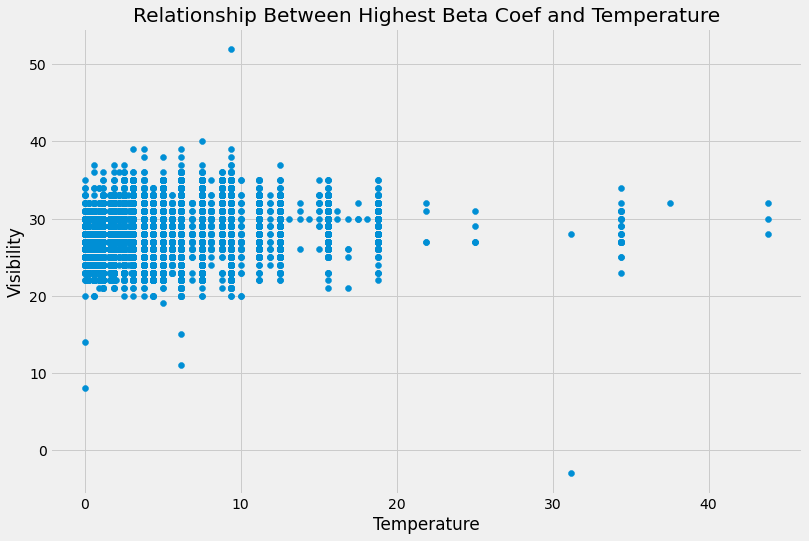

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.title("Relationship Between Highest Beta Coef and Temperature")
plt.xlabel("Temperature")
plt.ylabel("Visibility")
plt.scatter(df['visibility'], df['temperature'])
pd.DataFrame(list(zip(beta.columns, linear_model.coef_)))

5.Mean Squared Error of Predicted Temp vs Actual Temp

In [14]:
predict = linear_model.predict(beta)
df["Predictions"] = predict
df.head()

,datetime,wind_direction,wind_speed,sea_level_pressure,temperature,clouds,visibility,humidity,Predictions
0,197809140300,160,2,1007.7,30,BKN,15.6,0.75,28.612678
1,197810021500,0,0,1011.3,26,OVC,6.2,0.94,25.120723
2,197810252100,360,9,1004.1,26,BKN,6.2,0.80,28.038829
3,197810260000,360,21,1006.3,26,OVC,6.2,0.80,29.079458
4,197811131500,0,0,1010.1,26,BKN,11.2,0.88,26.294072


Text(0.5, 1.0, 'Predicted Temperature vs Observed Temperature')

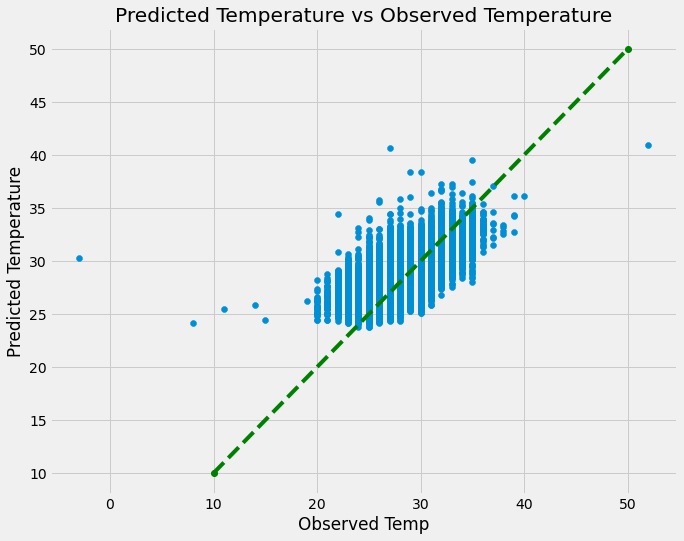

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(df['temperature'], linear_model.predict(beta))
plt.plot([10,50], [10,50], '--go')
plt.xlabel('Observed Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Predicted Temperature vs Observed Temperature')

In [20]:
mean_square_error = np.mean((df['temperature'] - linear_model.predict(beta)) ** 2)
mean_square_error

2.769320536176345

6.R Squared Score of the Linear Model

In [22]:
linear_model.score(beta, df['temperature']) 

0.47251833300397583

7.Is the model good? Why or why not? 

While the overall shape of the plots is kind of the same, with the plots following the angle of the line, most of the plots are situated mostly in the center, around 20-40 which means that while the deviation of the temperatures are not that much, the devation between the predicted temperature and the actual temperature is quite large. We can also see that the score of the linear model for this dataset is only 47.2% percent, which is very low, meaning that the model is subpar. 